2024-05-30 13:04:47.611414: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-30 13:04:47.611678: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 13:04:47.613877: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 13:04:47.644616: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 13:04:48.184070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

['val', 'test', 'train']
1341
normal picture title:  NORMAL2-IM-0619-0001.jpeg
pneumonia picture title: person580_bacteria_2387.jpeg


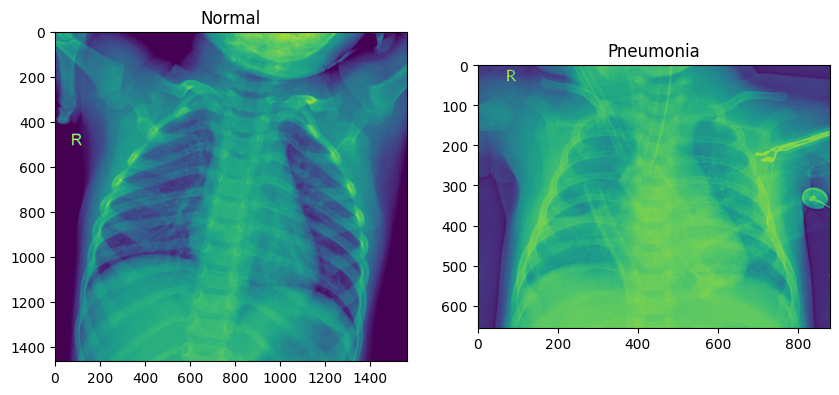

/home/loopy/intelAI/intel-04/workdir/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-30 13:04:49.530765: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


NameError: name 'model_fin' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, \
    Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics
import pandas as pd

mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'

# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()

# let's build the CNN model
#cnn = Sequential()
#Convolution
# model_in = Input(shape = (64, 64, 3))
# model = Flatten()(model_in)

# # Fully Connected Layers
# model = Dense(activation = 'relu', units = 128) (model)
# model = Dense(activation = 'relu', units = 64)(model)
# model = Dense(activation = 'sigmoid', units = 1)(model)

# # Compile the Neural network
# model_fin = Model(inputs=model_in, outputs=model)
# model_fin.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), ))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
#history = model.fit(training_set, epochs=5)

num_of_test_samples = 600
batch_size = 32

# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as
#your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) #Image normalization.

training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                target_size = (64, 64),
                                batch_size = 32,
                                class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('./chest_xray/val/',
            target_size=(64, 64),
            batch_size=32,
            class_mode='binary')

test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                    target_size = (64, 64),
                                    batch_size = 32,
                                    class_mode = 'binary')

#model_fin.summary()

#predict

#DATASET PREPARATION: fit (training)
history = model_fin.fit(training_set,
                            steps_per_epoch = 163,
                            epochs = 10,
                            #epochs = 10,
                            validation_data = validation_generator,
                            validation_steps = 624)
test_accu = model_fin.evaluate(test_set,steps=624)

model_fin.save('medical_ann.h5')
print('The testing accuracy is :',test_accu[1]*100, '%')

Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
actual || predict
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMON

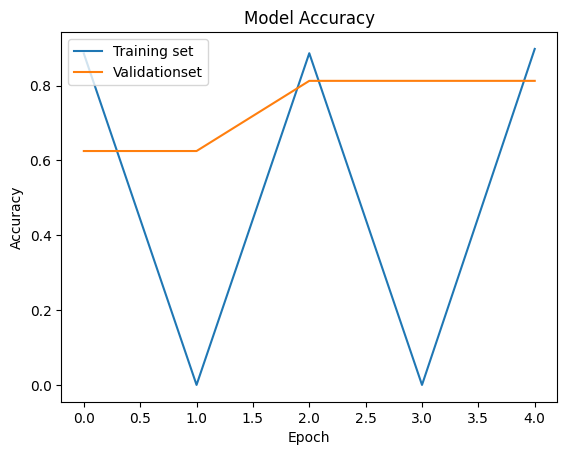

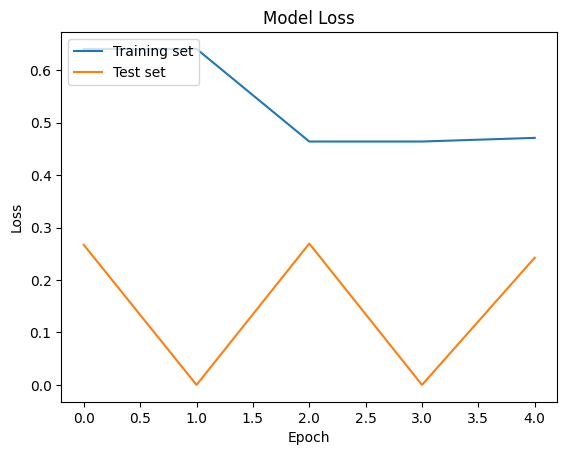

<Figure size 640x480 with 0 Axes>

In [9]:
# label 얻기 
labels = test_set.labels

Y_pred = model_fin.predict(test_set)
#y_pred = np.argmax(Y_pred)
y_pred = []
for yy in Y_pred:
    if yy >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

class_name = ["NORMAL", "PNEUMONIA"]
print("actual || predict")
for i in range(624):
    if i%10 == 0:
        print(class_name[labels[i]], end=" || ")
        print(class_name[y_pred[i]], end='\n')

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validationset'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()   

# Loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()
